See https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.use_jedi = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as sns; sns.set(font_scale=1.5)

> PCA does not perform well when there are nonlinear relationships within the data. 

> To address this deficiency, we can turn to a class of methods known as *manifold learning* — a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces

Manifold learning aims to represent high-dimensional data on a low-dimensional manifold (e.g. N-dimensional data on a 2-dimensional surface)

In [13]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


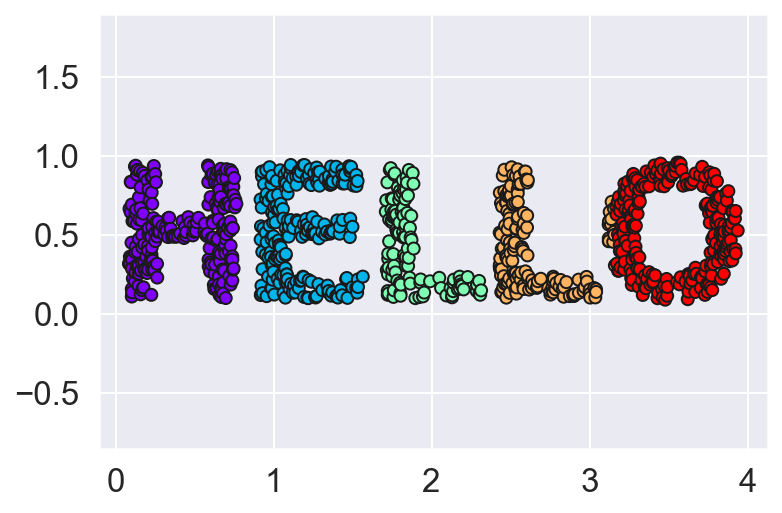

In [14]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize, edgecolors='k')
plt.axis('equal');

## Multidimensional Scaling (MDS)

> MDS: given a distance matrix between points, it recovers a D-dimensional coordinate representation of the data

In [21]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X)

model = MDS(n_components=2, dissimilarity='precomputed', random_state=3)
out = model.fit_transform(D)

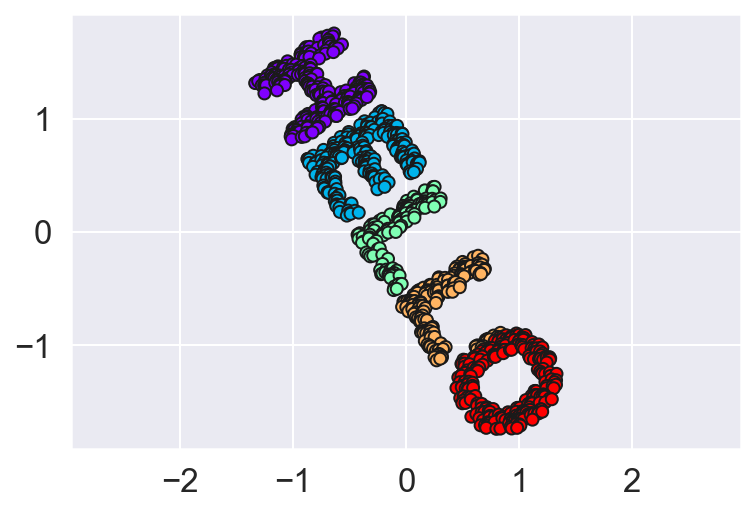

In [22]:
plt.scatter(out[:, 0], out[:, 1], **colorize, edgecolors='k')
plt.axis('equal');

> The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using only the N×N
 distance matrix describing the relationship between the data points.

### Where MDS fails: non-linear embedding

In [23]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

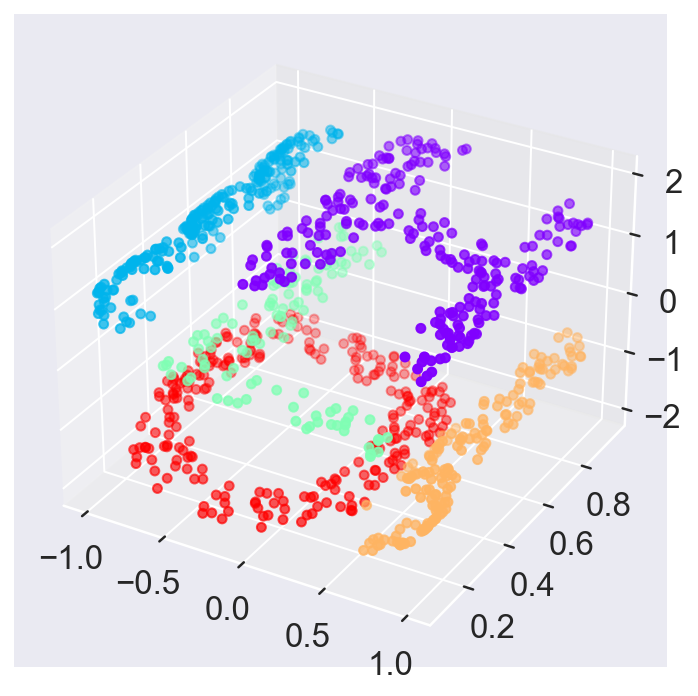

In [26]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

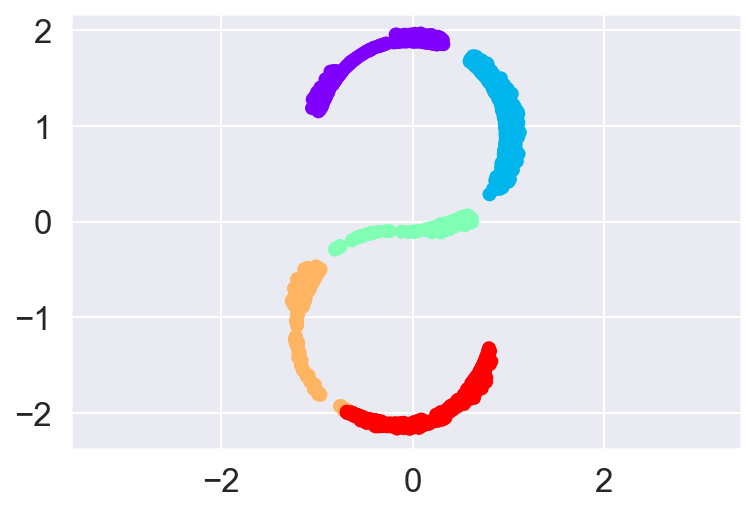

In [27]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

>  MDS tries to preserve distances between faraway points when constructing the embedding

## Locally Linear Embedding (LLE)

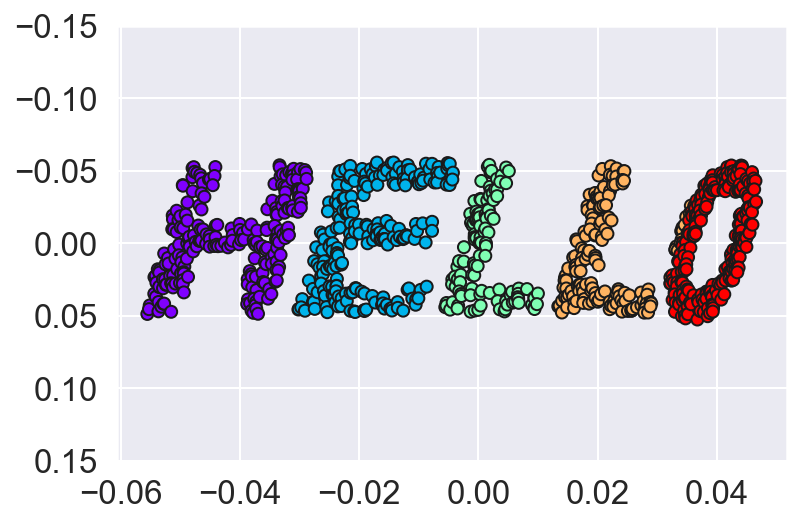

In [54]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize, edgecolors='k')
ax.set_ylim(0.15, -0.15);

Font-type changed in the embedding, but the results look a lot better than the MDS

However, changing the method completely changes the outcome

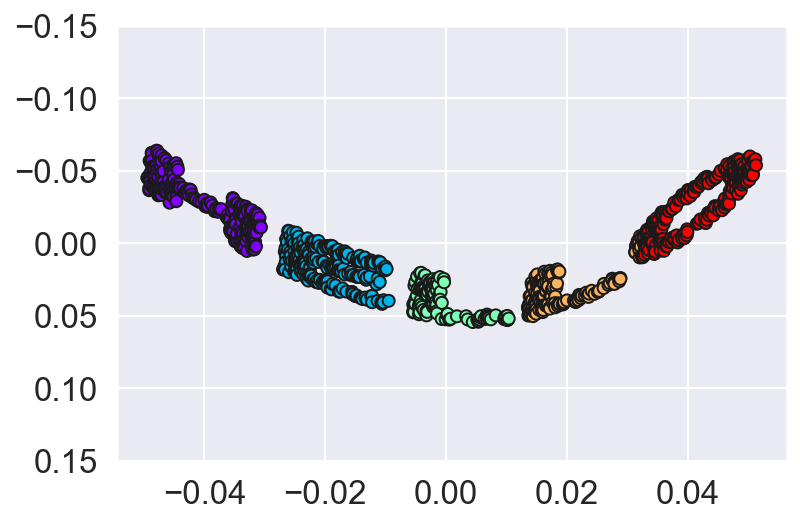

In [65]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='ltsa',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize, edgecolors='k')
ax.set_ylim(0.15, -0.15);

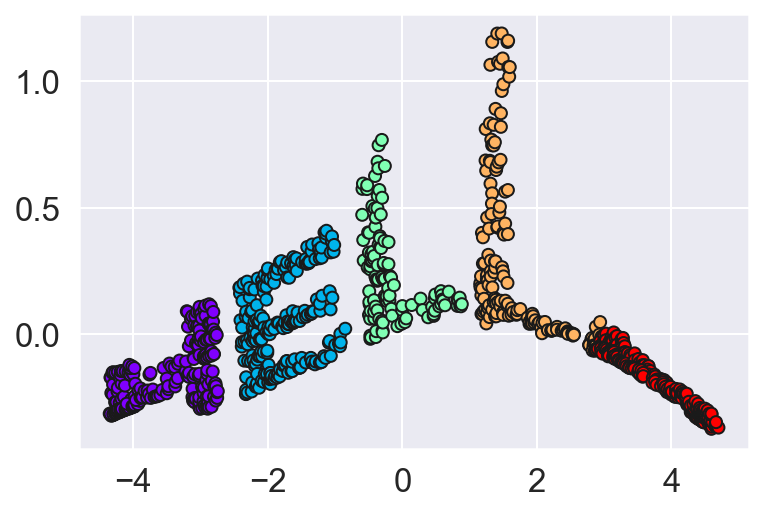

In [49]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=100, n_components=2,path_method='auto',
                               eigen_solver='auto')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize, edgecolors='k')
# ax.set_ylim(0.15, -0.15);

Okay, it is not easy to get it to look good!